In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('data_science_job.csv')
df.sample(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
10052,19526,city_21,0.624,Male,Has relevent experience,no_enrollment,NaN,NaN,10.0,100-500,Pvt Ltd,12.0,0.0
7939,24150,city_21,0.624,Male,No relevent experience,no_enrollment,Graduate,STEM,4.0,5000-9999,Pvt Ltd,54.0,1.0


In [3]:
df.shape

(19158, 13)

In [4]:
df.isna().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [5]:
df.isna().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [6]:
cols=[var for var in df.columns if df[var].isnull().mean()<0.05 and df[var].isnull().mean()>0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [7]:
df[cols].sample(4)

,city_development_index,enrolled_university,education_level,experience,training_hours
8523,0.920,no_enrollment,Graduate,20.0,14.0
4746,0.897,no_enrollment,Graduate,12.0,6.0
16470,0.624,no_enrollment,Masters,14.0,112.0
16968,0.920,no_enrollment,Primary School,1.0,57.0


In [8]:
len(df[cols].dropna()) / len(df)

0.8968577095730244

In [9]:
new_df=df[cols].dropna()
df.shape , new_df.shape

((19158, 13), (17182, 5))

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

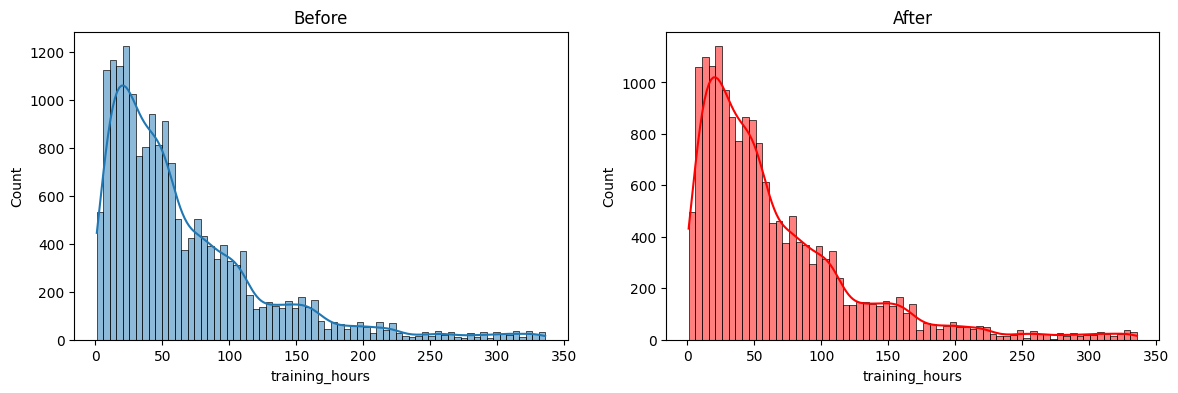

In [19]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.histplot(df['training_hours'],kde=True)
plt.title('Before')

plt.subplot(1,2,2)
sns.histplot(new_df['training_hours'],kde=True,color='red')
plt.title('After')

plt.show()

<Axes: >

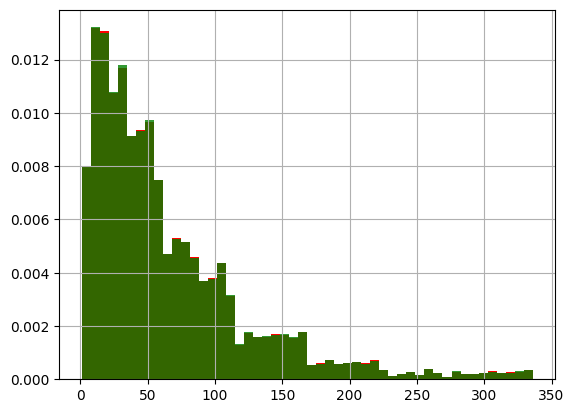

In [14]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

df['training_hours'].hist(bins=50,ax=ax,density=True,color='red')

new_df['training_hours'].hist(bins=50,ax=ax,color='green',density=True,alpha=0.8)

<Axes: ylabel='Density'>

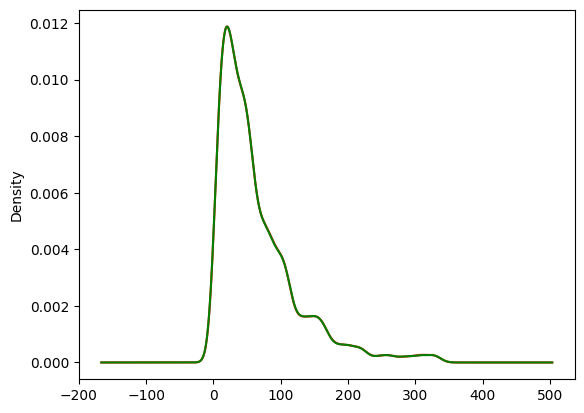

In [16]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

df['training_hours'].plot.density(color='red')

new_df['training_hours'].plot.density(color='green')

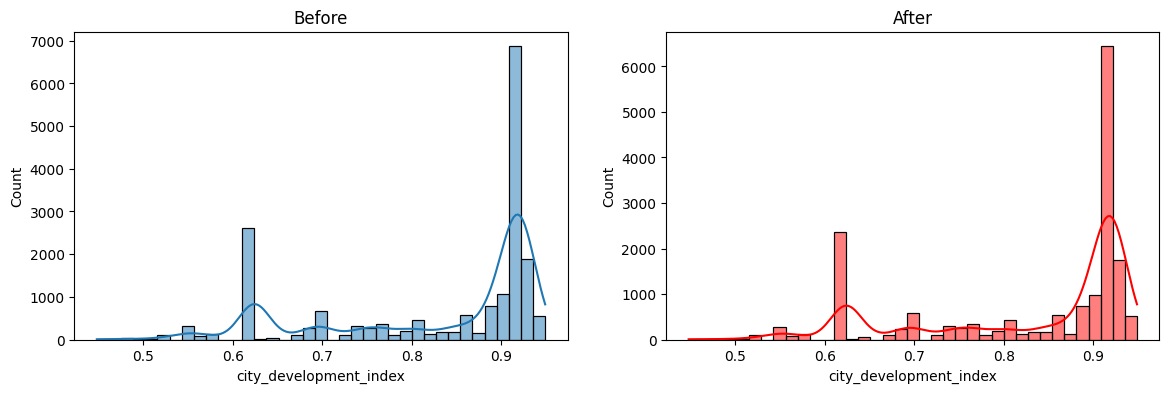

In [20]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.histplot(df['city_development_index'],kde=True)
plt.title('Before')

plt.subplot(1,2,2)
sns.histplot(new_df['city_development_index'],kde=True,color='red')
plt.title('After')

plt.show()

<Axes: ylabel='Density'>

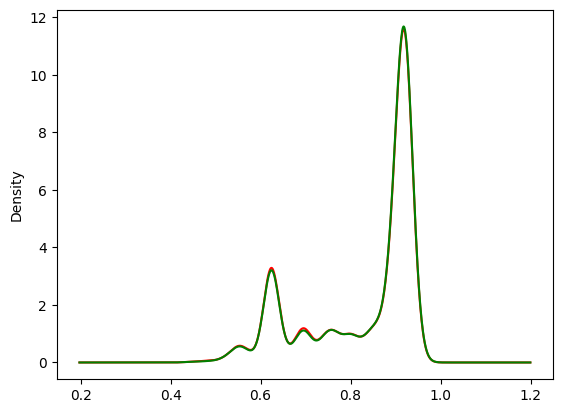

In [22]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

df['city_development_index'].plot.density(color='red')

new_df['city_development_index'].plot.density(color='green')

<Axes: >

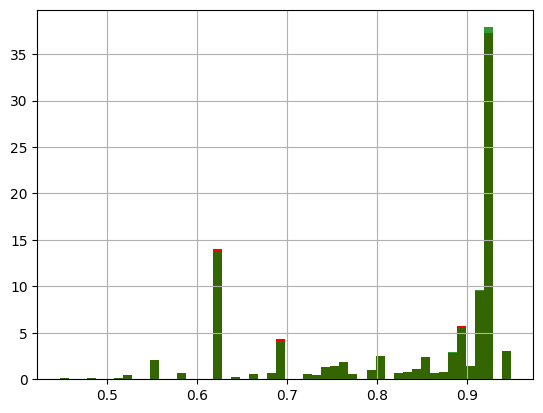

In [23]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

df['city_development_index'].hist(bins=50,ax=ax,density=True,color='red')

new_df['city_development_index'].hist(bins=50,ax=ax,color='green',density=True,alpha=0.8)

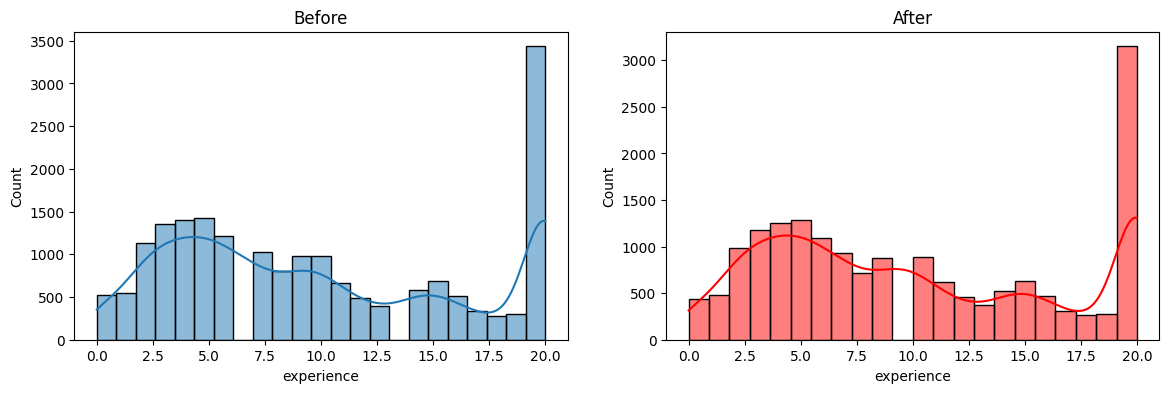

In [24]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.histplot(df['experience'],kde=True)
plt.title('Before')

plt.subplot(1,2,2)
sns.histplot(new_df['experience'],kde=True,color='red')
plt.title('After')

plt.show()

<Axes: >

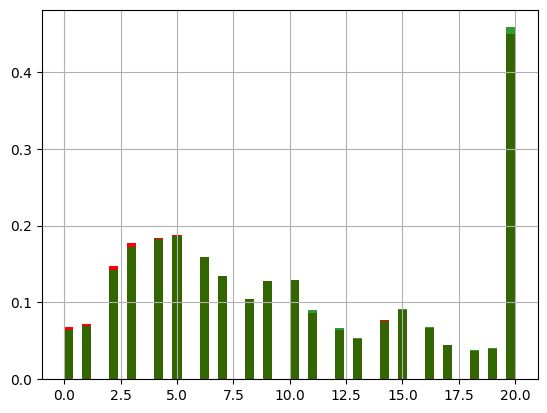

In [25]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

df['experience'].hist(bins=50,ax=ax,density=True,color='red')

new_df['experience'].hist(bins=50,ax=ax,color='green',density=True,alpha=0.8)

<Axes: ylabel='Density'>

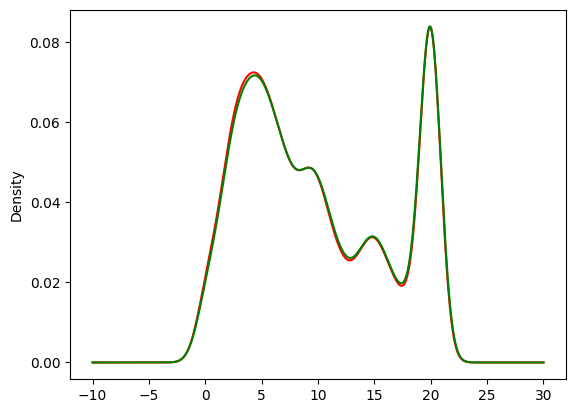

In [26]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)

df['experience'].plot.density(color='red')

new_df['experience'].plot.density(color='green')

In [28]:
temp=pd.concat([
    df['education_level'].value_counts()/ len(df),
    new_df['education_level'].value_counts()/ len(new_df)
], axis=1)
temp.columns=['original','cca']
temp

,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


In [29]:
temp=pd.concat([
    df['enrolled_university'].value_counts()/ len(df),
    new_df['enrolled_university'].value_counts()/ len(new_df)
], axis=1)
temp.columns=['original','cca']
temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079
